# Capstone Project - The Battle of Neighborhoods (Week 2).

#### Applied Data Science Capstone by IBM - Coursera.

### Table of contents

1. Introduction: Business Problem
2. Data Description
3. Methodology
4. Results and Discussion
5. Conclusion


# 1. Introduction

## 1.1 Description & Disscusion of the Background

Before describing our business problem and its interest, we first go to discover a historical city in Africa, the city of Dakar, which will be the subject of study for this project.
The city of Dakar (***in Wolof: Ndakaaru***) is the capital of the Republic of Senegal and the Dakar region. It has ***1,363,444 inhabitants*** out of a total ***population of 3,732,284*** (2019 estimate) in the Dakar region as a whole. It is one of Senegal's four historic municipalities and the former capital of ***French West Africa (AOF)***. Under the dual influence of migration flows from the countryside and natural increase, the Dakar region has developed very rapidly. It has thus increased from ***400,000 inhabitants in 1970 to 3.6 million inhabitants in 2018, an increase of nearly 5% per year***. Occupying only ***0.28% of the national territory***, the Dakar region covers ***550 km2, 25% of the population*** and concentrates ***80% of the country's economic activities***.

As part of its activities, the ***National Agency for Statistics and Demography*** (ANSD – Dakar) has published its estimates of Senegal's population by ***2025***. When a municipality sees its population increase, should it be considered, a priori, as an advantage or a disadvantage? Whatever the cause, the decrease in the population of a municipality very generally has financial consequences in terms of budget. On the one hand, the financial allocations paid by the State, which are based in particular on the number of inhabitants, are expected to decrease.

Indeed, when you think about it, demographics have an impact on pension and health insurance. In addition for the bourgeois class you expect them to prefer the chic neighborhoods but also the less populated districts. At the same time, they may want to choose neighborhoods based on the density of social places. This can also be the choice of large companies that want to set up in the city. The target audience and who would care about these problems are specially ***the authorities of each neighborhood***, ***the United Nations*** but also ***the Insurers, investors*** as well as ***the principales players in the economy***.However, it is difficult today to obtain information that can guide them in this direction.

To address these business issues we will present the current demographics as well as its projection for 2025 by gender for each neighborhood of this city. In order to know the popularity of each borough, we will analyze the venues of Dakar city. We will create a map and information chart where the real percentage by sex is placed on Dakar city and each neighborhood is clustered according to the venue density.

# 2. Data Description

To examine the problem, we can list the data as follows:
-	To have the Dakar Neighborhood Data the following features will be extracted: ***Borough, Neighborhood,Men_2019, Women_2019, Men_2025, Women_2025(Name_year contain the number of population by sex and year and these 2025 population projection) and the geospatial coordinates latitude and Longitude***.

-   For the features Borough, Neighborhood, I required to scrape the Wikipedia page and wrangle the data, clean it, and then read it into a pandas dataframe so that it is in a structured format.On the website of ***the National Agency for Statistics and Demography ANSD***, for each neighborhood of the city,I had to retrieve the demographic projections by sex and year and its ***2025 population projection***.

-   We used ***Google Map, ‘Search Nearby’*** option to get the geospatial coordinates latitude and Longitude of each Neighborhood. Coordinate of Dakar Center will be obtained by using ***Goog Maps API geocoding*** of well known location.

-   We used ***Forsquare API*** to get the most common venues of given Neighborhood of Dakar city.

-   Finally we will explore and cluster the neighborhoods of Dakar.


# 3. Methodology

In this project, we will first do web scraping with the powerful ***BeautefullSoup library** to build our first database containing two columns: ***Borough and neighborhood*** of Dakar city. 
Then we generate ***an algorithm*** that will allow us to upload our ***Excel CSV file*** containing the ***population of each neighborhood by sex and year*** as well as its ***geographical coordinates***. This will allow us to concatenate the two databases and move on to analysis.
In the analysis section, we will create ***two histograms*** presenting for each Neighborhood the ***percentage by sex for 2019*** as well as the ***projections for 2025***. And a ***last histogram*** for the ***total population by year***.

In the second part, we will ***segment and cluster each neighborhood*** of Dakar, create a ***map of Dakar*** with Neighborhoods superimposed on top. Then, explore Neighborhoods in ***Dakar Plateau*** by analyzing and clustering them using ***K-means clustering***.

Finally, we will discuss the ***results and draw the conclusion***.

## 3.1. Web scraping and data pre-processing

In [1]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
res = requests.get("https://en.wikipedia.org/wiki/Dakar_Region")
soup = bs(res.content,'lxml')
table = soup.find_all('table')[2] 
mydata = pd.read_html(str(table))

In [2]:
dakar = mydata[0]
df = dakar.iloc[3:22,[0, 1]]
df.iat[0, 0] = 'Almadies';df.iat[0, 1] = 'Mermoz-Sacré-Cœur'
df = df.reset_index(drop = True)
df.columns = ['Borough', 'Neighborhood']
df.head()

,Borough,Neighborhood
0,Almadies,Mermoz-Sacré-Cœur
1,Almadies,Ngor
2,Almadies,Ouakam
3,Almadies,Yoff
4,Dakar Plateau,Fann-Point E-Amitié


In [3]:
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]  #    OR    df = df.ix[:, cols]

In [4]:
# The code was removed by Watson Studio for sharing.

,H2019,F2019,H2025,F2025,Latitude,Longitude
0,16640,18810,19424,21957,14.712995,-17.471159
1,10391,10290,12129,12011,14.748792,-17.514961


In [5]:
Df = pd.concat([df, df_data_4], axis=1)
Df.head()

,Neighborhood,Borough,H2019,F2019,H2025,F2025,Latitude,Longitude
0,Mermoz-Sacré-Cœur,Almadies,16640,18810,19424,21957,14.712995,-17.471159
1,Ngor,Almadies,10391,10290,12129,12011,14.748792,-17.514961
2,Ouakam,Almadies,44281,44579,51689,52037,14.724737,-17.485066
3,Yoff,Almadies,50727,55681,59213,64996,14.760358,-17.468149
4,Fann-Point E-Amitié,Dakar Plateau,11119,11296,12979,13185,14.690791,-17.466559


In [6]:
Df.rename(columns={'H2019': 'Men_2019', 'F2019': 'Women_2019','H2025': 'Men_2025', 'F2025': 'Women_2025'}, inplace=True)
Df.head(3)

,Neighborhood,Borough,Men_2019,Women_2019,Men_2025,Women_2025,Latitude,Longitude
0,Mermoz-Sacré-Cœur,Almadies,16640,18810,19424,21957,14.712995,-17.471159
1,Ngor,Almadies,10391,10290,12129,12011,14.748792,-17.514961
2,Ouakam,Almadies,44281,44579,51689,52037,14.724737,-17.485066


In [7]:
df_DakarP = Df.drop(['Borough','Latitude','Longitude'], axis = 1)
df_Dakar = df_DakarP.set_index('Neighborhood')
df_Dakar.head(3)

,Men_2019,Women_2019,Men_2025,Women_2025
Neighborhood,,,,
Mermoz-Sacré-Cœur,16640,18810,19424,21957
Ngor,10391,10290,12129,12011
Ouakam,44281,44579,51689,52037


In [8]:
df_Dakar.index.names = [None]

In [9]:
df_Dakar.head()

,Men_2019,Women_2019,Men_2025,Women_2025
Mermoz-Sacré-Cœur,16640,18810,19424,21957
Ngor,10391,10290,12129,12011
Ouakam,44281,44579,51689,52037
Yoff,50727,55681,59213,64996
Fann-Point E-Amitié,11119,11296,12979,13185


### 3.1.1 Visualizing Data using Matplotlib

#### Let's visualize the percentage of male and female in each Neighborhoods in Dakar Area for 2019 and 2025.

In [10]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  2.1.0


##### First, prepare our data frame
Convert the numbers into percentages of the total number of male and female according to the year.

In [11]:
result = df_Dakar.drop(['Men_2025','Women_2025'], axis = 1)
df_Dakar_2019 = result.div(result.sum(1), axis=0)
df_Dakar_2019.head(3)

,Men_2019,Women_2019
Mermoz-Sacré-Cœur,0.469394,0.530606
Ngor,0.502442,0.497558
Ouakam,0.498323,0.501677


Sort the dataframe in descending order of Men_2019

In [12]:
df_Dakar_2019.sort_values(['Men_2019'], ascending=False, axis=0, inplace=True)
df_Dakar_2019 = df_Dakar_2019.round(2)
df_Dakar_2019.head(3)

,Men_2019,Women_2019
Médina,0.55,0.45
Biscuiterie,0.54,0.46
Grand Dakar,0.53,0.47


In [13]:
result1 = df_Dakar.drop(['Men_2019','Women_2019'], axis = 1)
df_Dakar_2025 = result1.div(result1.sum(1), axis=0)
df_Dakar_2025.sort_values(['Men_2025'], ascending=False, axis=0, inplace=True)

In [14]:
df_Dakar_2025 = df_Dakar_2025.round(2)
df_Dakar_2025.head()

,Men_2025,Women_2025
Médina,0.55,0.45
Biscuiterie,0.54,0.46
Grand Dakar,0.53,0.47
Gueule Tapée-Fass-Colobane,0.53,0.47
Plateau,0.52,0.48


In [15]:
df_2025 = result1.div(result1.sum(1), axis=0)
df_Dakar_Population_2019_2025 = pd.concat([df_Dakar_2019, df_2025.round(2)], axis=1)
df_Dakar_Population_2019_2025.head()

,Men_2019,Women_2019,Men_2025,Women_2025
Biscuiterie,0.54,0.46,0.54,0.46
Cambérène,0.50,0.50,0.50,0.50
Dieuppeul-Derklé,0.48,0.52,0.48,0.52
Fann-Point E-Amitié,0.50,0.50,0.50,0.50
Gorée,0.47,0.53,0.47,0.53


##### Let's plot the histogram of Dakar population in 2019 by gender

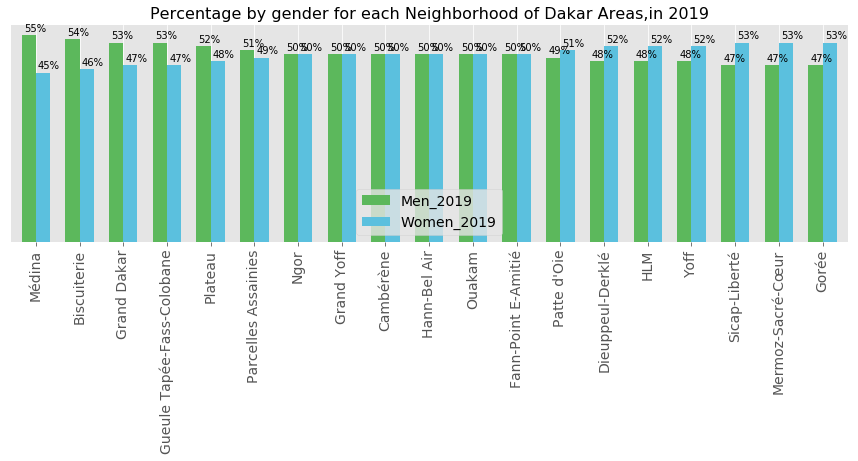

In [16]:
colors_list = ['#5cb85c','#5bc0de']
result19 = df_Dakar_2019
# Change this line to plot percentages instead of absolute values
ax = result19.plot(kind='bar',figsize=(15,4),width = 0.65,color = colors_list,edgecolor=None)
plt.legend(labels=result19.columns,fontsize= 14)
plt.title("Percentage by gender for each Neighborhood of Dakar Areas,in 2019",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.15*width, p.get_y() + height + 0.01))

##### Let's plot the histogram of Dakar population projection in 2025 by gender for each Neighborhood

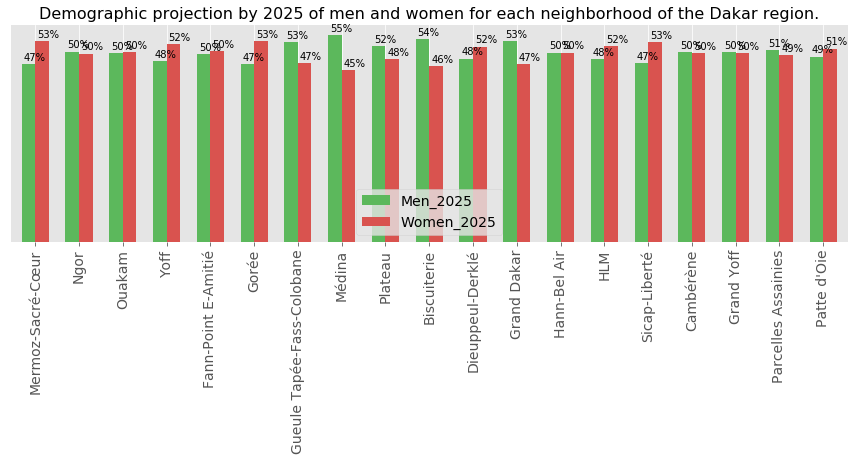

In [17]:
colors_list = ['#5cb85c','#d9534f']
result25 = df_2025
# Change this line to plot percentages instead of absolute values
ax = result25.plot(kind='bar',figsize=(15,4),width = 0.62,color = colors_list,edgecolor=None)
plt.legend(labels=result25.columns,fontsize= 14)
plt.title("Demographic projection by 2025 of men and women for each neighborhood of the Dakar region.",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.15*width, p.get_y() + height + 0.01))

Data frame of population and its projection to 2025

In [18]:
df_Dakar['Population_2019'] = df_Dakar['Men_2019'] + df_Dakar['Women_2019']
df_Dakar['Population_2025'] = df_Dakar['Men_2025'] + df_Dakar['Women_2025']
df_Population_Dakar_2019_2025 = df_Dakar.drop(['Men_2019','Women_2019','Men_2025','Women_2025'], axis = 1)
df_Population_Dakar_2019_2025.head()

,Population_2019,Population_2025
Mermoz-Sacré-Cœur,35450,41381
Ngor,20681,24140
Ouakam,88860,103726
Yoff,106408,124209
Fann-Point E-Amitié,22415,26164


In [19]:
df_Population_Dakar_2019_2025.sort_values(['Population_2019'], ascending=False, axis=0, inplace=True)
df_Population_Dakar_2019_2025.head()

,Population_2019,Population_2025
Grand Yoff,220691,257613
Parcelles Assainies,189753,221498
Yoff,106408,124209
Médina,97533,113850
Ouakam,88860,103726


##### Let's  plot 2019 total population and its projection to 2025 for each Neighborhood.

([], <a list of 0 Text yticklabel objects>)

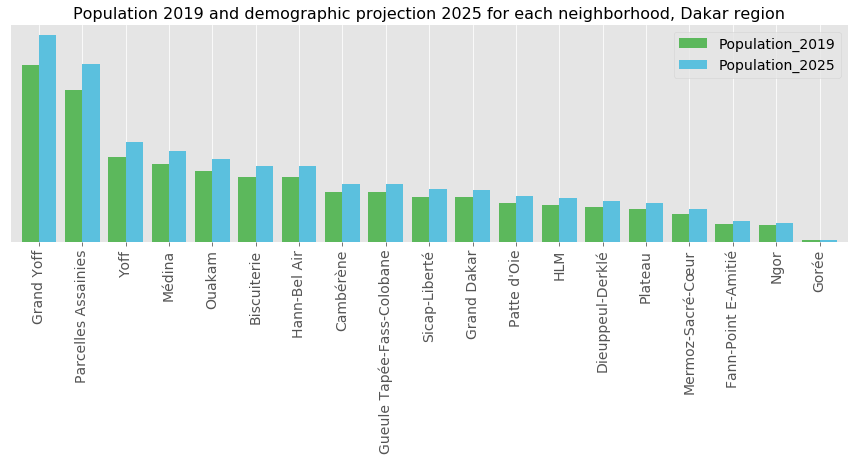

In [20]:
colors_list = ['#5cb85c','#5bc0de']
result1925 = df_Population_Dakar_2019_2025
# Change this line to plot percentages instead of absolute values
#ax = (result1925.div(result1925.sum(0), axis=1)).plot(kind='bar',figsize=(15,4),width = 0.8,color = colors_list,edgecolor=None)
ax = result1925.plot(kind='bar',figsize=(15,4),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=result1925.columns,fontsize= 14)
plt.title("Population 2019 and demographic projection 2025 for each neighborhood, Dakar region",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

***Let's now determine the demographic evolution rate of each district of Dakar for the period 2019 to 2025.***

First, let's get the right dataframe.

In [21]:
Df['Population_2019'] = Df['Men_2019'] + Df['Women_2019']
Df['Population_2025'] = Df['Men_2025'] + Df['Women_2025']
Df_2019_2025 = Df.drop(['Men_2019','Women_2019','Men_2025','Women_2025','Latitude','Longitude'], axis = 1)

In [22]:
Df_2025 = Df_2019_2025.drop(['Population_2019','Neighborhood'], axis = 1)
Df_2019 = Df_2019_2025.drop(['Population_2025', 'Neighborhood'], axis = 1)

In [23]:
Df_25 = Df_2025.groupby(['Borough'])['Population_2025'].sum().reset_index()
Df_19 = Df_2019.groupby(['Borough'])['Population_2019'].sum().reset_index()

In [24]:
df_Pop = pd.concat([Df_19, Df_25.drop(['Borough'], axis = 1)], axis=1)

In [25]:
df_Pop.drop(['Borough'], axis = 1)

,Population_2019,Population_2025
0,251399,293456
1,225428,263142
2,364907,425956
3,521711,608992


In [26]:
Df2 = Df.groupby("Borough").agg(lambda x: ','.join(set(x)))
Df2.reset_index(level = 0, inplace = True)

In [27]:
df19_25 = pd.concat([Df2, df_Pop.drop(['Borough'], axis = 1)], axis=1)
df19_25

,Borough,Neighborhood,Population_2019,Population_2025
0,Almadies,"Ngor,Mermoz-Sacré-Cœur,Yoff,Ouakam",251399,293456
1,Dakar Plateau,"Gorée,Plateau,Médina,Fann-Point E-Amitié,Gueul...",225428,263142
2,Grand Dakar,"Sicap-Liberté,Biscuiterie,Grand Dakar,Dieuppeu...",364907,425956
3,Parcelles Assainies,"Cambérène,Patte d'Oie,Parcelles Assainies,Gran...",521711,608992


In [28]:
df19_25['demographic_rate'] = df19_25['Population_2025'] - df19_25['Population_2019']

In [29]:
df_DakarPopulation_2019_2025 = df19_25
#df19_25['demographic_rate']=((df19_25['demographic_rate']/df19_25['Population_2019'])*100).round(2).astype(str) + '%'
df19_25['demographic_rate']=df19_25['demographic_rate']/df19_25['Population_2019']
df_DakarPopulation_2019_2025

,Borough,Neighborhood,Population_2019,Population_2025,demographic_rate
0,Almadies,"Ngor,Mermoz-Sacré-Cœur,Yoff,Ouakam",251399,293456,0.167292
1,Dakar Plateau,"Gorée,Plateau,Médina,Fann-Point E-Amitié,Gueul...",225428,263142,0.167300
2,Grand Dakar,"Sicap-Liberté,Biscuiterie,Grand Dakar,Dieuppeu...",364907,425956,0.167300
3,Parcelles Assainies,"Cambérène,Patte d'Oie,Parcelles Assainies,Gran...",521711,608992,0.167298


## 3.2. Create a map of Dakar, Segment and Cluster each neighborhood of Dakar

In [30]:
 import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # 
import folium # map rendering library

print('Libraries imported.')
   

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.19.0-py_0 conda-forge

geographiclib- 100% |################################| Time: 0:00:00  24.33 MB/s
geopy-1.19.0-p 100% |################################| Time: 0:00:00  36.59 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  52.93 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  37.10 MB/s
vincent-0.4.4- 100% |###################

In [31]:
Dakar_neighborhoods = Df.drop(['Men_2019','Women_2019','Men_2025','Women_2025'], axis = 1)
Dakar_neighborhoods.head(3)

,Neighborhood,Borough,Latitude,Longitude,Population_2019,Population_2025
0,Mermoz-Sacré-Cœur,Almadies,14.712995,-17.471159,35450,41381
1,Ngor,Almadies,14.748792,-17.514961,20681,24140
2,Ouakam,Almadies,14.724737,-17.485066,88860,103726


Let's check the number of boroughs and neighborhoods in Dakar Areas.

In [32]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(Dakar_neighborhoods['Borough'].unique()),
        Dakar_neighborhoods.shape[0]
    )
)


The dataframe has 4 boroughs and 19 neighborhoods.


#### Use geopy library to get the latitude and longitude values of Dakar City.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent ny_explorer, as shown below.

In [33]:
##
address = 'Dakar'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Dakar are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Dakar are 14.693425, -17.447938.


#### Create a map of Dakar with neighborhoods superimposed on top.

Folium is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.


In [65]:
# create map of Dakar using latitude and longitude values
Dakar_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Dakar_neighborhoods['Latitude'], Dakar_neighborhoods['Longitude'], Dakar_neighborhoods['Neighborhood'], Dakar_neighborhoods['Borough']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Dakar_map)  
    
Dakar_map

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version.

In [35]:
# The code was removed by Watson Studio for sharing.

#### Let's explore the eight neighborhood in our dataframe.

Get the neighborhood's name.

In [36]:
Dakar_neighborhoods.loc[8, 'Neighborhood']

'Plateau'

Get the neighborhood's latitude and longitude values.

In [37]:
neighborhood_latitude = Dakar_neighborhoods.loc[8, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Dakar_neighborhoods.loc[8, 'Longitude'] # neighborhood longitude value
neighborhood_name = Dakar_neighborhoods.loc[8, 'Neighborhood'] # neighborhood name
print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Plateau are 14.6675661, -17.4328936.


#### Now, let's get the top 100 venues that are in Dakar plateau within a radius of 500 meters.

First, let's create the GET request URL. Name your URL url.

In [38]:
search_query = neighborhood_name
radius = 600
LIMIT = 100
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, 
CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, search_query, radius, LIMIT)

Plateau .... OK!


Send the GET request and examine the resutls.

In [39]:
results = requests.get(url).json()

Let's extracts the categorie of the venue.

In [40]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.


In [41]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Résidence du Plateau,Resort,14.665698,-17.435277
1,Dakar Plateau,Plaza,14.666117,-17.435861


And how many venues were returned by Foursquare?

In [42]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

2 venues were returned by Foursquare.


### 3.2.1. Explore Neighborhoods in Dakar Plateau

Let's create a function to repeat the same process to all the neighborhoods with only borough Dakar Plateau.

In [43]:
# The code was removed by Watson Studio for sharing.

In [44]:
Dakar_Plateau_data = Dakar_neighborhoods[Dakar_neighborhoods['Borough'] == 'Dakar Plateau']
Dakar_Plateau_data

,Neighborhood,Borough,Latitude,Longitude,Population_2019,Population_2025
4,Fann-Point E-Amitié,Dakar Plateau,14.690791,-17.466559,22415,26164
5,Gorée,Dakar Plateau,14.666410,-17.398279,1998,2333
6,Gueule Tapée-Fass-Colobane,Dakar Plateau,14.688142,-17.455588,62184,72588
7,Médina,Dakar Plateau,14.680487,-17.450928,97533,113850
8,Plateau,Dakar Plateau,14.667566,-17.432894,41298,48207


Code to run the above function on each neighborhood and create a new dataframe called Dakar_Plateau_venues.

In [45]:
Dakar_Plateau_venues = getNearbyVenues(names = Dakar_Plateau_data['Neighborhood'],
                                   latitudes = Dakar_Plateau_data['Latitude'],
                                  longitudes = Dakar_Plateau_data['Longitude']
                                  )

Fann-Point E-Amitié
Gorée
Gueule Tapée-Fass-Colobane
Médina
Plateau


Let's check the size of the resulting dataframe.

In [46]:
print(Dakar_Plateau_venues.shape)
Dakar_Plateau_venues.head(2)

(42, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Fann-Point E-Amitié,14.690791,-17.466559,Tennis & Squash(UCAD),14.687146,-17.468209,Tennis Court
1,Gorée,14.666410,-17.398279,Mémorial de Gorée du Castel,14.666089,-17.398053,History Museum


Let's check how many venues were returned for each neighborhood.

In [67]:
Dakar_Plateau_venues.groupby('Neighborhood').count().head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Fann-Point E-Amitié,1,1,1,1,1,1
Gorée,5,5,5,5,5,5
Gueule Tapée-Fass-Colobane,4,4,4,4,4,4
Médina,1,1,1,1,1,1
Plateau,31,31,31,31,31,31


#### Let's find out how many unique categories can be curated from all the returned venues.

In [47]:
print('There are {} uniques categories.'.format(len(Dakar_Plateau_venues['Venue Category'].unique())))

There are 32 uniques categories.


 ### 3.2.2. Analyze Each Neighborhood

In [48]:
# one hot encoding
Dakar_Plateau_onehot = pd.get_dummies(Dakar_Plateau_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
Dakar_Plateau_onehot['Neighborhood'] = Dakar_Plateau_venues['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns = [Dakar_Plateau_onehot.columns[-1]] + list(Dakar_Plateau_onehot.columns[:-1])
Dakar_Plateau_onehot = Dakar_Plateau_onehot[fixed_columns]
Dakar_Plateau_onehot.head(2)

,Neighborhood,African Restaurant,American Restaurant,Argentinian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Boat or Ferry,Bookstore,Breakfast Spot,Burger Joint,Café,Cosmetics Shop,Deli / Bodega,Dessert Shop,Fast Food Restaurant,French Restaurant,History Museum,Hotel,Italian Restaurant,Lounge,Middle Eastern Restaurant,Music Venue,Pizza Place,Pool,Restaurant,Seafood Restaurant,Shopping Mall,Snack Place,Steakhouse,Tea Room,Tennis Court
0,Fann-Point E-Amitié,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Gorée,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


let's examine the new dataframe size.

In [49]:
Dakar_Plateau_onehot.shape

(42, 33)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category.

In [50]:
Dakar_Plateau_grouped = Dakar_Plateau_onehot.groupby('Neighborhood').mean().reset_index()

Let's confirm the new size.

In [51]:
Dakar_Plateau_grouped.shape

(5, 33)

#### Let's print each neighborhood along with the top 5 most common venues.

In [52]:
num_top_venues = 5
for hood in Dakar_Plateau_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Dakar_Plateau_grouped[Dakar_Plateau_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Fann-Point E-Amitié----
                 venue  freq
0         Tennis Court   1.0
1  American Restaurant   0.0
2             Tea Room   0.0
3           Steakhouse   0.0
4          Snack Place   0.0


----Gorée----
                venue  freq
0      History Museum   0.2
1       Boat or Ferry   0.2
2          Restaurant   0.2
3  Italian Restaurant   0.2
4               Hotel   0.2


----Gueule Tapée-Fass-Colobane----
                 venue  freq
0  American Restaurant  0.25
1                Hotel  0.25
2        Shopping Mall  0.25
3       Cosmetics Shop  0.25
4          Pizza Place  0.00


----Médina----
                 venue  freq
0   African Restaurant   1.0
1  American Restaurant   0.0
2             Tea Room   0.0
3           Steakhouse   0.0
4          Snack Place   0.0


----Plateau----
                  venue  freq
0   American Restaurant  0.13
1                  Café  0.10
2                 Hotel  0.06
3    African Restaurant  0.03
4  Fast Food Restaurant  0.03




#### Let's put that into a pandas dataframe.

First, let's write a function to sort the venues in descending order.

In [53]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [54]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Dakar_Plateau_grouped['Neighborhood']
for ind in np.arange(Dakar_Plateau_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Dakar_Plateau_grouped.iloc[ind, :], num_top_venues)
neighborhoods_venues_sorted.head

<bound method NDFrame.head of                  Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0         Fann-Point E-Amitié          Tennis Court              Tea Room   
1                       Gorée         Boat or Ferry        History Museum   
2  Gueule Tapée-Fass-Colobane   American Restaurant        Cosmetics Shop   
3                      Médina    African Restaurant              Tea Room   
4                     Plateau   American Restaurant                  Café   

  3rd Most Common Venue   4th Most Common Venue 5th Most Common Venue  \
0   American Restaurant  Argentinian Restaurant    Athletics & Sports   
1                 Hotel              Restaurant    Italian Restaurant   
2         Shopping Mall                   Hotel          Tennis Court   
3   American Restaurant  Argentinian Restaurant    Athletics & Sports   
4                 Hotel    Fast Food Restaurant              Tea Room   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venu

### 3.3. Cluster Neighborhoods

Run k-means to cluster the neighborhood into K clusters.

***Let's find the degree for optimum k of the K-Means.***

In [55]:
Dakar_Plateau_grouped_clustering = Dakar_Plateau_grouped.drop('Neighborhood', 1)

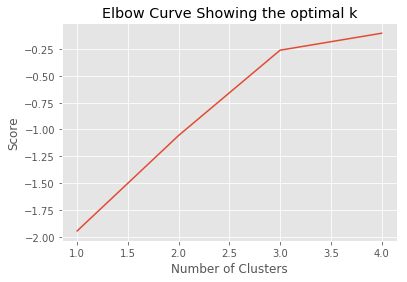

In [56]:
import pandas
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
Y = Dakar_Plateau_grouped_clustering
Nc = range(1, 5)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans
score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve Showing the optimal k')
pl.show()

In [57]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Dakar_Plateau_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 0, 1, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [58]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
Dakar_Plateau_merged = Dakar_Plateau_data
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Dakar_Plateau_merged = Dakar_Plateau_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [59]:
Dakar_Plateau_merged

,Neighborhood,Borough,Latitude,Longitude,Population_2019,Population_2025,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Fann-Point E-Amitié,Dakar Plateau,14.690791,-17.466559,22415,26164,2,Tennis Court,Tea Room,American Restaurant,Argentinian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Boat or Ferry,Bookstore
5,Gorée,Dakar Plateau,14.666410,-17.398279,1998,2333,0,Boat or Ferry,History Museum,Hotel,Restaurant,Italian Restaurant,Bookstore,Café,Burger Joint,Breakfast Spot,Tennis Court
6,Gueule Tapée-Fass-Colobane,Dakar Plateau,14.688142,-17.455588,62184,72588,0,American Restaurant,Cosmetics Shop,Shopping Mall,Hotel,Tennis Court,Bookstore,Café,Burger Joint,Breakfast Spot,Bar
7,Médina,Dakar Plateau,14.680487,-17.450928,97533,113850,1,African Restaurant,Tea Room,American Restaurant,Argentinian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Boat or Ferry,Bookstore
8,Plateau,Dakar Plateau,14.667566,-17.432894,41298,48207,0,American Restaurant,Café,Hotel,Fast Food Restaurant,Tea Room,Argentinian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar


Finally, let's visualize the resulting clusters.

In [61]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Dakar_Plateau_merged['Latitude'], Dakar_Plateau_merged['Longitude'], Dakar_Plateau_merged['Neighborhood'], Dakar_Plateau_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 3.4 Examine Clusters

Now, let's can examine each cluster and determine the discriminating venue categories that distinguish each cluster.

#### Cluster 1

In [62]:
Dakar_Plateau_merged.loc[Dakar_Plateau_merged['Cluster Labels'] == 0, Dakar_Plateau_merged.columns[[0] + list(range(5, Dakar_Plateau_merged.shape[1]))]]

,Neighborhood,Population_2025,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Gorée,2333,0,Boat or Ferry,History Museum,Hotel,Restaurant,Italian Restaurant,Bookstore,Café,Burger Joint,Breakfast Spot,Tennis Court
6,Gueule Tapée-Fass-Colobane,72588,0,American Restaurant,Cosmetics Shop,Shopping Mall,Hotel,Tennis Court,Bookstore,Café,Burger Joint,Breakfast Spot,Bar
8,Plateau,48207,0,American Restaurant,Café,Hotel,Fast Food Restaurant,Tea Room,Argentinian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar


#### Cluster 2

In [63]:
Dakar_Plateau_merged.loc[Dakar_Plateau_merged['Cluster Labels'] == 1, Dakar_Plateau_merged.columns[[0] + list(range(5, Dakar_Plateau_merged.shape[1]))]]

,Neighborhood,Population_2025,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Médina,113850,1,African Restaurant,Tea Room,American Restaurant,Argentinian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Boat or Ferry,Bookstore


#### Cluster 3

In [66]:
Dakar_Plateau_merged.loc[Dakar_Plateau_merged['Cluster Labels'] == 2, Dakar_Plateau_merged.columns[[0] + list(range(5, Dakar_Plateau_merged.shape[1]))]]

,Neighborhood,Population_2025,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Fann-Point E-Amitié,26164,2,Tennis Court,Tea Room,American Restaurant,Argentinian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Boat or Ferry,Bookstore


After the analysis we notice the categories of discriminating venues are:History Museum, African Restaurant and Tennis Court.

# 4.Results and Discussion

It is important to note that the stagnation or decline in the number of inhabitants in a municipality must generally be interpreted as negative factors related to poorer living conditions, a particularly weak fertility context, a situation considered repulsive or a poor anticipation of housing needs, to the point of explaining migration losses. 
As I have already said, under the dual influence of rural migratory flows and natural increase, the Dakar region has developed very rapidly. So will we expect a population boom in this region by ***2025?*** Of course, because the results of our analysis reveal the following:
In ***2019***, the number of women is greater than or equal to that of men in ***12 of Dakar's 19 neighborhoods***.
Unlike the neighborhood of ***Medina, Biscuitérie, Grand Dakar, Guele Tapée-Fass-Colobane, plateau and Parcelle Assainies***, where men outnumber women. 
In addition, the three most populated neighborhoods are respectively ***Grand Yoff, Parcelle Assainies and Yoff*** and the least populated are ***Fann-Point-E-Amitié, Ngor and Gorée*** .And in ***2025***, the same observation is made according to the projections except for Gorée where the population will remain stagnant. However, the population will increase in all boroughs by ***16.73%*** in ***2025***.
It is also worth noting that the most populated boroughs are successively Parcelles Assainies, Grand Dakar, Almadies and Dakar Plateau. 
Thus, Dakar Plateau is the least populated borough. In addition, the analysis of this borough revealed that it contains ***42 venues, 33 of which are unique***, but also its neighborhoods can be grouped into three groups of three, one and one.
These results seem quite correct because in the least populated neighborhoods there are more intellectuals and bourgeois people than in the most populated ones where the working class resides. Which also explains more venues in the least populated.

# 5. Conclusion

The objective of this project is to identify relevant information that can facilitate decision-making by our target audience as well as stakeholders. We can say that we have achieved our objectives well and well because we were able to obtain the following key information:
By ***2025***, the population of the Dakar region will increase by ***16.73%*** (and this is the same population rate in all boroughs). In addition, the number of women will remain approximately higher than that of men almost everywhere in the different neighborhoods of Dakar. 
Dakar Plateau is the least populated borough and then Almadies. This can be explained by the larger number of bourgeois residents in these boroughs.
Therefore, given the relatively high population rate, it can be expected that there will be insecurity in the most populated district municipalities. But also an impact on pension and health insurance systems. In any case, demography is an economic asset if it is controlled.
We hope that these results will allow decision-makers to better orient their strategic decisions.